# Install Dependencies

In [1]:
!conda install -y -c anaconda -y networkx
!conda install -y -c anaconda -y requests
!conda install -y -c anaconda -y pandas # Important
!conda install -y -c conda-forge -y geopandas
!conda install -y -c anaconda -y scipy # Important
!conda install -y -c anaconda -y numpy
!conda install -y -c anaconda -y scikit-learn # Important Maybe
!conda install -y osmnx=0.11.4

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - networkx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         3.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                      pkgs/main::conda-4.7.12-py37_0 --> anaconda::conda-4.8.3-py37_0



conda-4.8.3          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: / WARNING conda.core.path_actions:verify(963): Unable to create 

gdal-2.3.3           | 1023 KB   | ##################################### | 100% 
libdap4-3.19.1       | 1.7 MB    | ##################################### | 100% 
certifi-2019.9.11    | 147 KB    | ##################################### | 100% 
munch-2.5.0          | 12 KB     | ##################################### | 100% 
giflib-5.1.7         | 140 KB    | ##################################### | 100% 
fiona-1.8.4          | 988 KB    | ##################################### | 100% 
pyproj-1.9.6         | 65 KB     | ##################################### | 100% 
poppler-data-0.4.9   | 3.4 MB    | ##################################### | 100% 
click-plugins-1.1.1  | 9 KB      | ##################################### | 100% 
openjpeg-2.3.1       | 377 KB    | ##################################### | 100% 
proj4-5.2.0          | 7.0 MB    | ##################################### | 100% 
xerces-c-3.2.2       | 1.5 MB    | ##################################### | 100% 
libspatialite-4.3.0a | 3.1 M

In [40]:
from matplotlib import pyplot as plt

In [41]:
# Import the notebook with some useful functions
%run util.ipynb

could not import non-essential module osmnx


# Read Data

In [42]:
test = pd.read_csv('data/processed_test.zip')
train = pd.read_csv('data/processed_train.zip')

In [43]:
print(test.shape)
print(train.shape)
#(790891, 16)
#(3927323, 16)

(790891, 16)
(3927323, 16)


In [44]:
# Remove everything outside Manhattan area rectangle
test = test[(test.pickup_longitude.between(-74.02, -73.91)) &\
            (test.pickup_latitude.between(40.70, 40.86)) & \
            (test.dropoff_longitude.between(-74.02, -73.91)) &\
            (test.dropoff_latitude.between(40.70, 40.86))]
train = train[(train.pickup_longitude.between(-74.02, -73.91)) &\
            (train.pickup_latitude.between(40.70, 40.86)) & \
            (train.dropoff_longitude.between(-74.02, -73.91)) &\
            (train.dropoff_latitude.between(40.70, 40.86))]

In [45]:
print(test.shape)
print(train.shape)

(710982, 16)
(3343247, 16)


In [46]:
train.head()

,Unnamed: 0,dropoff_datetime,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_duration,vendor_id,node_lat,node_lng,order,osm_node
0,0,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.750751,-73.968402,0,42444055
1,1,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.751748,-73.970804,1,42442947
2,2,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.752692,-73.973037,2,42444051
3,3,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.753367,-73.974648,3,42444049
4,4,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.754349,-73.976974,4,42443810


# Get Graph (map)

* Get a graph (nodes and edges) of a preferred location using string address
* Plot a random route just as demo
* This demo shows how to get the best route (theoretcally) between two coordinates (it is a relatively slow process)
* You only need to use this if you want to improve the data we already created as we already saved the best routes in the csv

In [14]:
G = get_graph('Manhattan, New York City, New York, USA')

NameError: name 'ox' is not defined

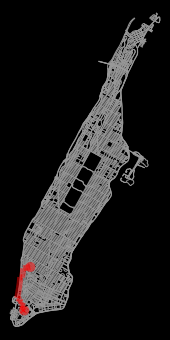

In [10]:
plot_route(G, (40.735018, -74.003215), (40.710040, -74.007163))

# Example (geoindex)

* Here we create a KDTree and demo how to get nearest points from our dataframe with O(1) time

In [15]:
# Build tree (we add noise because we want to avoid having points on top of each other)
noise = pd.np.random.uniform(0, 0.000001, size=(len(train), 2))
tree = KDTree(data=train[['node_lat', 'node_lng']].values + noise)

In [47]:
# Points within approx 25 meters
train.iloc[tree.query_ball_point((40.735018, -74.003215), 0.0003)]

,Unnamed: 0,dropoff_datetime,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_duration,vendor_id,node_lat,node_lng,order,osm_node
2157570,2157570,2016-04-02 13:45:06,40.734859,-74.003479,id1274683,1,2016-04-02 13:41:32,40.737190,-73.996208,N,214,2,40.734891,-74.003153,8,42452598
2494943,2494943,2016-02-01 21:30:34,40.733326,-74.008400,id1247731,1,2016-02-01 21:24:48,40.736771,-73.997513,N,346,1,40.734891,-74.003153,7,42452598
371944,371944,2016-02-05 18:48:00,40.735302,-74.006065,id1927318,2,2016-02-05 18:32:27,40.741394,-73.985527,N,933,1,40.734891,-74.003153,22,42452598
380214,380214,2016-01-29 21:41:27,40.734695,-74.004646,id0056842,1,2016-01-29 21:32:39,40.726124,-74.001450,N,528,2,40.734891,-74.003153,17,42452598
423631,423631,2016-05-06 18:22:21,40.734539,-74.007179,id2211669,2,2016-05-06 18:17:44,40.743744,-73.995789,N,277,1,40.734891,-74.003153,16,42452598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894682,1894682,2016-02-20 18:00:05,40.735443,-74.003311,id2150341,1,2016-02-20 17:52:16,40.752319,-73.989876,N,469,1,40.734891,-74.003153,29,42452598
3740883,3740883,2016-02-05 20:36:56,40.737026,-74.003738,id3768071,1,2016-02-05 20:28:23,40.725700,-74.007324,N,513,2,40.734891,-74.003153,15,42452598
3792481,3792481,2016-05-11 06:02:08,40.734489,-74.004723,id0169026,1,2016-05-11 05:53:46,40.745621,-73.981941,N,502,2,40.734891,-74.003153,32,42452598
2467063,2467063,2016-06-04 23:41:14,40.733990,-74.004967,id1529819,1,2016-06-04 23:32:16,40.722229,-73.997078,N,538,2,40.734891,-74.003153,21,42452598


# Attempt

In [48]:
train.columns

Index(['Unnamed: 0', 'dropoff_datetime', 'dropoff_latitude',
       'dropoff_longitude', 'id', 'passenger_count', 'pickup_datetime',
       'pickup_latitude', 'pickup_longitude', 'store_and_fwd_flag',
       'trip_duration', 'vendor_id', 'node_lat', 'node_lng', 'order',
       'osm_node'],
      dtype='object')

# Try not to use OpenMap steps

In [96]:
train_clean = train.copy()[["id","dropoff_latitude","dropoff_longitude",
                           "pickup_latitude","pickup_longitude",
                           "trip_duration"]].drop_duplicates()
train_clean

,id,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,trip_duration
0,id3070143,40.759827,-73.989830,40.750599,-73.968559,548
11,id3350654,40.762070,-73.990028,40.773525,-73.957748,866
42,id2963634,40.750938,-73.968742,40.731262,-74.003815,984
111,id1045348,40.745903,-73.994461,40.763821,-73.973297,735
146,id2514561,40.724812,-73.989967,40.752579,-73.975014,652
...,...,...,...,...,...,...
3927221,id0949876,40.749149,-73.991699,40.742031,-73.980782,606
3927233,id2435971,40.763897,-73.964447,40.778599,-73.945229,552
3927247,id1814835,40.747620,-73.972000,40.746098,-73.988068,480
3927266,id2938857,40.709526,-74.014687,40.742702,-74.003822,617


In [97]:
len(train_clean)

130923

In [99]:
train_clean = train_clean[train_clean["trip_duration"]<10000]
train_clean["trip_duration"].describe()

count    130752.000000
mean        766.080504
std         468.276158
min           2.000000
25%         427.000000
50%         668.000000
75%         998.000000
max        6880.000000
Name: trip_duration, dtype: float64

In [100]:
len(train_clean)

130752

In [104]:
(min(train_clean["pickup_latitude"]), min(train_clean["pickup_longitude"]))

(40.70002365112305, -74.01803588867188)

In [105]:
(max(train_clean["pickup_latitude"]), max(train_clean["pickup_latitude"]))

(40.85919570922852, 40.85919570922852)

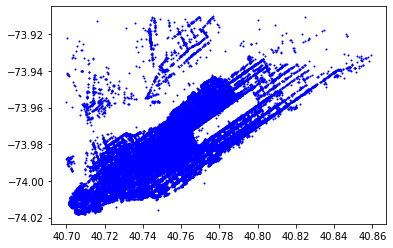

In [108]:
# Pickup locations
plt.plot(train_clean["pickup_latitude"], train_clean["pickup_longitude"], 'bo', markerSize=1)

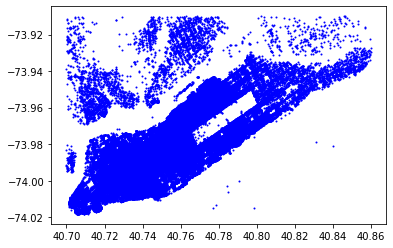

In [109]:
# Dropoff locations
plt.plot(train_clean["dropoff_latitude"], train_clean["dropoff_longitude"], 'bo', markerSize=1)

In [228]:
# Bin into NxN blocks (zones)
N = 30
min_lat = min(train_clean["pickup_latitude"].min(), train_clean["dropoff_latitude"].min())
max_lat = max(train_clean["pickup_latitude"].max(), train_clean["dropoff_latitude"].max())
min_lng = min(train_clean["pickup_longitude"].min(), train_clean["dropoff_longitude"].min())
max_lng = max(train_clean["pickup_longitude"].max(), train_clean["dropoff_longitude"].max())

print(min_lat, max_lat, min_lng, max_lng)

bin_lat = (max_lat - min_lat)/N
bin_lng = (max_lng - min_lng)/N

train_clean.loc[:, "bin_lat_pickup"] = (train_clean.loc[:,"pickup_latitude"] - min_lat) // bin_lat
train_clean.loc[:, "bin_lng_pickup"] = (train_clean.loc[:,"pickup_longitude"] - min_lng) // bin_lng
train_clean.loc[:, "bin_lat_drop"] = (train_clean.loc[:,"dropoff_latitude"] - min_lat) // bin_lat
train_clean.loc[:, "bin_lng_drop"] = (train_clean.loc[:,"dropoff_longitude"] - min_lng) // bin_lng

40.70000076293945 40.85980224609375 -74.01814270019531 -73.91000366210938


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [229]:
train_clean[["bin_lat_pickup","bin_lng_pickup","bin_lat_drop","bin_lng_drop"]].describe()

,bin_lat_pickup,bin_lng_pickup,bin_lat_drop,bin_lng_drop
count,130752.000000,130752.000000,130752.000000,130752.000000
mean,9.575991,9.673863,9.898579,10.316699
std,4.125079,4.683131,4.719260,5.308639
min,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,7.000000,7.000000
50%,10.000000,9.000000,10.000000,10.000000
75%,12.000000,13.000000,13.000000,14.000000
max,29.000000,29.000000,30.000000,30.000000


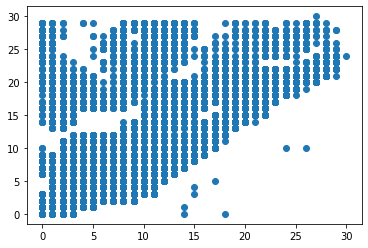

In [230]:
# Drop off bins
plt.scatter(train_clean["bin_lat_drop"], train_clean["bin_lng_drop"])

In [231]:
# Zone to zone average velocity
train_clean.loc[:, "zone_pickup"] = train_clean.loc[:, "bin_lat_pickup"] * N + train_clean.loc[:, "bin_lng_pickup"]
train_clean.loc[:, "zone_drop"] = train_clean.loc[:, "bin_lat_drop"] * N + train_clean.loc[:, "bin_lng_drop"]

zones = train_clean[["zone_pickup","zone_drop","trip_duration"]]\
    .groupby(["zone_pickup", "zone_drop"])\
    .agg({"trip_duration": "mean"})\
    .reset_index(drop=False)

In [213]:
zones[:5]

,zone_pickup,zone_drop,trip_duration
0,0.0,2.0,267.0
1,0.0,8.0,801.0
2,0.0,22.0,1315.0
3,0.0,30.0,381.5
4,0.0,31.0,332.5


In [214]:
zones.loc[:, "pred"] = zones.loc[:, "trip_duration"]
zones_full = zones.copy()
zones = zones[["zone_pickup","zone_drop", "pred"]]
zones[:5]

,zone_pickup,zone_drop,pred
0,0.0,2.0,267.0
1,0.0,8.0,801.0
2,0.0,22.0,1315.0
3,0.0,30.0,381.5
4,0.0,31.0,332.5


In [225]:
# Breakout short rides
zones[zones.pred < 30].sort_values("pred")

,zone_pickup,zone_drop,pred
5730,152.0,152.0,2.0
16363,304.0,304.0,2.0
21275,345.0,317.0,12.0
21650,355.0,384.0,15.0
24333,386.0,386.0,15.0
25313,404.0,404.0,15.0
771,32.0,32.0,16.0
32837,561.0,562.0,19.0
21645,355.0,355.0,26.0
13673,259.0,259.0,27.0


In [226]:
# Breakout long rides
zones[zones.pred > 1000].sort_values("pred", ascending=False)

,zone_pickup,zone_drop,pred
6216,154.0,710.0,5783.000000
22336,369.0,238.0,5707.000000
32015,530.0,92.0,5222.000000
6420,156.0,99.0,5187.000000
9042,189.0,832.0,4952.000000
...,...,...,...
25553,405.0,554.0,1000.500000
30185,491.0,341.0,1000.454545
4381,124.0,309.0,1000.444444
15673,281.0,404.0,1000.428571


,zone_pickup,zone_drop,pred
0,0.0,2.0,267.0
1,0.0,8.0,801.0
2,0.0,22.0,1315.0
3,0.0,30.0,381.5
4,0.0,31.0,332.5
...,...,...,...
34527,893.0,345.0,1302.0
34528,893.0,522.0,1259.0
34529,893.0,614.0,1120.0
34530,893.0,675.0,973.0


# TEST

In [215]:
testQ = test.drop_duplicates(["id"])
len(testQ)

44435

In [216]:
def cap(a):
    return np.clip(a, 0, N-1)
testQ.loc[:, "bin_lat_pickup"] = cap((testQ.loc[:,"pickup_latitude"] - min_lat) // bin_lat)
testQ.loc[:, "bin_lng_pickup"] = cap((testQ.loc[:,"pickup_longitude"] - min_lng) // bin_lng)
testQ.loc[:, "bin_lat_drop"] = cap((testQ.loc[:,"dropoff_latitude"] - min_lat) // bin_lat)
testQ.loc[:, "bin_lng_drop"] = cap((testQ.loc[:,"dropoff_longitude"] - min_lng) // bin_lng)
testQ.loc[:, "zone_pickup"] = testQ.loc[:, "bin_lat_pickup"] * N + testQ.loc[:, "bin_lng_pickup"]
testQ.loc[:, "zone_drop"] = testQ.loc[:, "bin_lat_drop"] * N + testQ.loc[:, "bin_lng_drop"]


In [217]:
testQ[["bin_lat_pickup","bin_lng_pickup","bin_lat_drop","bin_lng_drop"]].describe()

,bin_lat_pickup,bin_lng_pickup,bin_lat_drop,bin_lng_drop
count,44435.000000,44435.000000,44435.000000,44435.000000
mean,9.876471,10.152717,9.968066,10.469247
std,4.012339,4.715032,4.225471,4.992844
min,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,7.000000,7.000000
50%,10.000000,10.000000,10.000000,10.000000
75%,12.000000,13.000000,13.000000,14.000000
max,29.000000,29.000000,29.000000,29.000000


In [218]:
# Just use the average time from zone-to-zone
pred = testQ.merge(zones, how='left', on=['zone_pickup', 'zone_drop'])
pred[:5]

,Unnamed: 0,dropoff_datetime,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,...,node_lng,order,osm_node,bin_lat_pickup,bin_lng_pickup,bin_lat_drop,bin_lng_drop,zone_pickup,zone_drop,pred
0,0,2016-01-12 14:05:36,40.761532,-73.982506,id3623250,1,2016-01-12 13:54:58,40.756218,-73.970177,N,...,-73.970302,0,42440463,10.0,13.0,11.0,9.0,313.0,339.0,728.052632
1,8,2016-06-09 12:56:59,40.771976,-73.964180,id0822417,1,2016-06-09 12:54:57,40.769985,-73.960480,N,...,-73.960604,0,42436486,13.0,15.0,13.0,14.0,405.0,404.0,294.400000
2,13,2016-03-17 17:58:26,40.781208,-73.979965,id0384037,1,2016-03-17 17:56:13,40.785934,-73.978615,N,...,-73.978649,0,42428661,16.0,10.0,15.0,10.0,490.0,460.0,189.500000
3,22,2016-02-13 23:28:59,40.729530,-73.986984,id1014017,1,2016-02-13 23:26:51,40.725990,-73.991753,N,...,-73.991729,0,1773084405,4.0,7.0,5.0,8.0,127.0,158.0,404.166667
4,33,2016-03-16 07:28:46,40.748821,-73.969536,id3296899,1,2016-03-16 07:24:21,40.733101,-73.975540,N,...,-73.975436,0,685164636,6.0,11.0,9.0,13.0,191.0,283.0,421.666667


In [219]:
pred["pred"].describe()

count    40616.000000
mean       522.715177
std        272.576223
min          2.000000
25%        327.307692
50%        469.585714
75%        653.925000
max       3300.000000
Name: pred, dtype: float64

In [220]:
len(pred[pred["pred"].isnull()])

3819

In [221]:
len(pred[pred["pred"].notnull()])

40616

In [222]:
evaluate(pred[pred["pred"].notnull()], "trip_duration", "pred")

0.6346998746759246

# Baseline

* Here we are predicting that all taxi rides in the test set will take simply the average time in the training set
* This is the baseline to beat

In [9]:
# Calc mean trip duration in the training set
mean = train.groupby('id').agg({'trip_duration': 'first'}).mean()
test['pred'] = mean['trip_duration']
mean

trip_duration    871.235925
dtype: float64

In [10]:
# Evaluate
evaluate(test, 'trip_duration', 'pred')

1.0872240148148207